Imports, plotting inline, and random seed

In [1]:
import torch 
import torchvision
import numpy as np
import matplotlib.pyplot as plt 

from IPython import display 
import time

%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(seed=485)

Initial values

In [2]:
n = 28*28   # number of image pixels
m = 60000   # number of images in training set
eta = 0.1  # learning rate parameter
epsinit = 0.01  # initial size of synaptic weights
w = epsinit*torch.rand(n)   # random initialization of weight vector
b = epsinit*torch.rand(1)    # random initialization of bias 

tmax = 60000           # number of learning updates
errcl = torch.zeros(tmax)    # classification error vs. time

Set up train and test data.

In [3]:
mnist_train = torchvision.datasets.MNIST(root='data', train=True, download=True) # train data only
mnist_test = torchvision.datasets.MNIST(root='data', train=False, download=True) # test data only

trainindices = torch.randperm(60000)
trainimages = mnist_train.train_data[trainindices]
trainlabels = mnist_train.train_labels[trainindices]

testindices = torch.randperm(10000)
testimages = mnist_test.test_data[testindices]
testlabels = mnist_test.test_labels[testindices]

Functions to visualize training (displays the weight vector, input vector, and running error).

In [4]:
def plot_image(image):
    nr, nc = image.shape 
    extent = [-0.5, nc-0.5, nr-0.5, -0.5] 
    plt.imshow(image.numpy(), extent=extent, origin='upper', interpolation='nearest') 

    
def visualize(t, errcl, w, x):
    errorrate = np.divide(
        np.cumsum(errcl[: t + 1]),
        range(1, t + 2)
    )

    display.clear_output(wait=True)

    plt.subplot(1, 3, 1)
    #plot_image(np.reshape(w, [28, 28]))
    plot_image(w.view((28,28)))
    plt.title("weight vector at t = " + str(t + 1))

    plt.subplot(1, 3, 2)
    plot_image(x.view((28,28)))
    plt.title("input vector")

    plt.subplot(1, 3, 3)
    plt.plot(errorrate, color='red')
    plt.title("average class error = " + str(errorrate[t]))
    plt.ylim(0, 1)

    plt.subplots_adjust(wspace=.5)

    plt.gcf().set_size_inches(18.5, 10.5)
    display.display(plt.gcf())

The training loop.

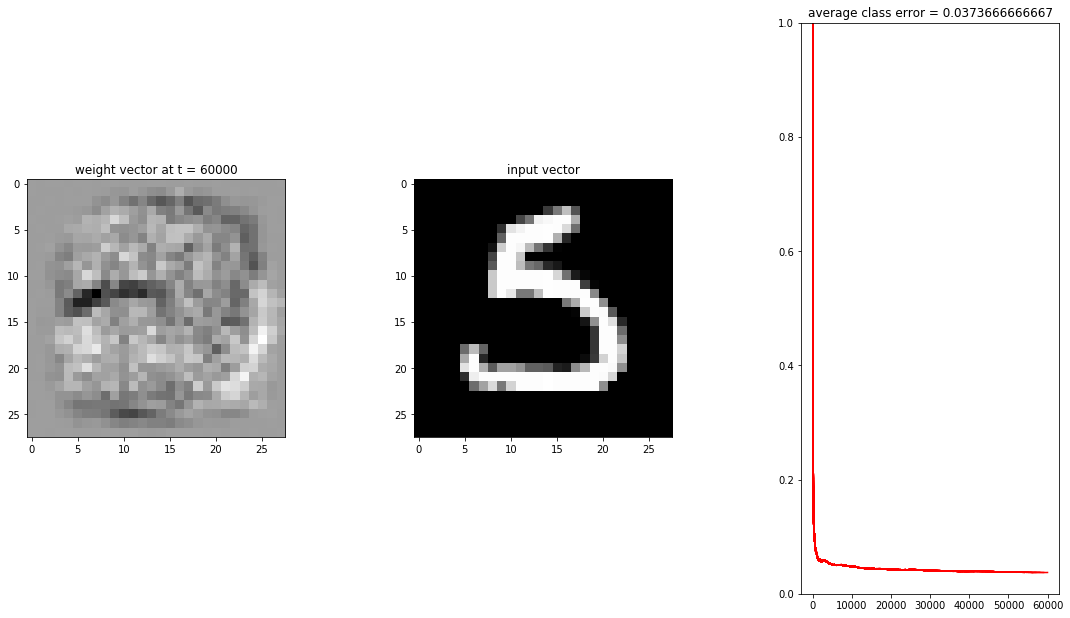

In [5]:
for t in range(0, tmax):     # iterate over the train steps
    i = torch.floor(m*torch.rand(1)).long()    # choose a random example
    x = trainimages[i].view(-1)                # flatten image
    x = x.float() / 255.0                      # normalize max value to one 
    desired = np.float64(trainlabels[i] == 2)  # get true label as a float
    actual = np.float64(torch.sum(w*x) + b > 0)
    delta = desired - actual
    errcl[t] = abs(desired - actual)           # error between true and predicted
    w += eta * delta * x                       # weight update
    b += eta * delta                           # bias update
    if t % 1000 == 0:    # display every 1000 time steps
        visualize(t, errcl.numpy(), w, x)        
        time.sleep(0.01)    

# show final statistics
visualize(t, errcl.numpy(), w, x)  
display.clear_output(wait=True)